# K nearest Neighbours with Python

You have been given a classified data set from a company ! They have hidden the feature columns names but we have given you the data and the target classes.

we'll try to use KNN to create a model that directly predicts a class for a new data point based off of  the feature

Lets grab it and use it!

In [1]:
# importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Get th Data

In [10]:
data = pd.read_csv("Classified Data.txt",index_col=0)

In [11]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardize the variables

Because the KNN classifier predicts the class of a given test observation by identifying the observation that are nearest to it  the scale of the variable matters. Any variables that are on a large scale will have a much larger efect on the distance between the observation and hence on the KNN classifier than variable that are on a small scale

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

In [15]:
scaled_feature = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [16]:
data_feat = pd.DataFrame(scaled_feature,columns=data.columns[:-1])
data_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(scaled_feature,data['TARGET CLASS'],test_size=0.30)

# Using KNN

Remember that we are trying to come up with a model to predict whether someone will the target class or not .Well's start with k=1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test)

# Predictio and Evaluation

lets evaluate our KNN model

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[134  15]
 [ 11 140]]


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       149
           1       0.90      0.93      0.92       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Choosing a K VAlue

lets go ahead and use the elbow method to pick a good K Value

In [30]:
error_rate = []

#Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

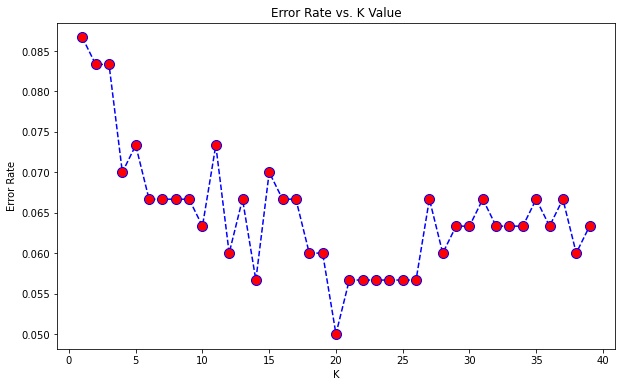

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that the after arounds K>23 the error rate just tends to hover around 00.6-0.05. Lets retrain the model with that and check the classification report

In [33]:
#First a quick comparision to our original K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[134  15]
 [ 11 140]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       149
           1       0.90      0.93      0.92       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [34]:

# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[135  14]
 [  3 148]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       149
           1       0.91      0.98      0.95       151

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300

